# Digital Marketing Dashboard with atoti.
\[_In case you’re unable to see the atoti visualizations in GitHub, try viewing the notebook in [nbviewer](https://nbviewer.org/github/atoti/notebooks/blob/master/notebooks/digital-marketing-dashboard/main.ipynb)._]

## Overview

Digital Marketing is ubiquitous.  

Using the various online media channels, companies endorse goods, services, and brands by the means of digital marketing.  
While modern day digital marketing is an enormous system of channels to which marketers simply must onboard their brands, advertising online is much more complex than the channels alone.  

So this notebook tries to address the key issue faced by executives globally - to have a single platform to track their diverse KPIs.  

**In this notebook we will also explore the fact that we can created multiple cubes and build a common dashboard with widgets from these cubes.**  


In this notebook, we shall be using [atoti](https://www.atoti.io/) to focus on three key aspects of digital marketing:

* Newsletters
* Website Statistics
* Social Media posts

**So tag along and learn how to build your own personalized digital marketing dashboard!**

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=creditcard-fraud-detection" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover.png" alt="Try atoti"></a></div>

In [1]:
# Importing the necessary packages
import atoti as tt

In [2]:
# creating a session - it spins up an in-memory database - similar to Apache Spark - ready to slice’n’dice your big data set.
# In addition to that, it launches a dashboarding Tableau-like web-app
session = tt.Session(user_content_storage="content")

## Analysis 1. Analysis around the newsletter subscribers:

Here we shall explore a dataset on the newsletter statistics.  
We will make various widgets from it and then summmarize them all in a dashboard.

In [3]:
# loading newletter data, load the csv file directly into the store

nl_store = session.read_csv(
    "s3://data.atoti.io/notebooks/digital-marketing-dashboard/news_letter_df.csv",
    keys=["cust_id"],
    table_name="newsletter",
)
nl_store.head()

,name,country,subscription_channel,date_of_subscription,customer_domain,NL_opened,NL_clicked,bounced
cust_id,,,,,,,,
5004108234652,Blake Russell,Moldova,direct,2021-04-06,Banking,0,0,0
6563621873841,Kevin Reeves MD,Colombia,Social_media,2021-01-01,Insurance,0,0,0
9672365374907,Julia Romero,Dominica,Social_media,2021-03-29,Insurance,0,0,0
1343922135689,Hannah Jackson,Andorra,Social_media,2021-04-20,Banking,0,0,0
4117335222819,Destiny Ramirez,Lebanon,Social_media,2021-01-01,Consulting,1,0,0


In [4]:
# create a cube for the newsletter
cube_nl = session.create_cube(nl_store, name="nl")

In [5]:
# defining the measure, level and hierarchy in the cube.

h, l, m = cube_nl.hierarchies, cube_nl.levels, cube_nl.measures

In [6]:
# Here we create levels on date using the 'date_of_subscription'

cube_nl.create_date_hierarchy(
    "Date",
    column=nl_store["date_of_subscription"],
    levels={"Year": "YYYY", "Quarter": "QQQ", "Month": "MM", "Week number": "w"},
)

In [7]:
session.visualize("Evolution of subscribers with time")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [8]:
m["open_rate"] = m["NL_opened.SUM"] / m["contributors.COUNT"]
m["bounced_rate"] = m["bounced.SUM"] / m["contributors.COUNT"]
m["click_through_rate"] = m["NL_clicked.SUM"] / m["contributors.COUNT"]

In [9]:
session.visualize("Click through and open rate by customer domain")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [10]:
session.visualize("Click through and open rate by subscription channel")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [11]:
m["YTD Subscribers"] = tt.agg.sum(
    m["contributors.COUNT"],
    scope=tt.scope.cumulative(l["Week number"], partitioning=l["Year"]),
)

In [12]:
session.visualize("Subcription by channel")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [13]:
# let us summarize this information in a dasboard.
session.link(path="#/dashboard/02f")

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

## Section 2: Web analytics

Here we shall explore a dataset on the web analytics.  
We will make various widgets from it and then summmarize them all in a dashboard.  

Since, this is a different dataset, we shall create a new cube for this dataset, but we will still be loading the results in the same dashboard.

In [14]:
# loading web data, load the csv file directly into the store

web_store = session.read_csv(
    "s3://data.atoti.io/notebooks/digital-marketing-dashboard/web_df.csv",
    keys=["ip"],
    table_name="web",
)
web_store.head()

,country,date,channel,clicked,page_visited,time_spent,bounced,visitor_type
ip,,,,,,,,
144.99.59.168,Cote d'Ivoire,2021-01-05,Organic,1,Articles,50,0,Returning
215.147.150.186,Swaziland,2021-06-04,Referral,1,Install,56,1,New
12.60.120.109,Myanmar,2021-03-28,Ad,0,Install,60,0,Returning
196.92.2.64,France,2021-01-24,Ad,0,Tutorial,52,1,Returning
53.210.66.177,Macedonia,2021-05-13,Organic,1,Home,58,0,New


In [15]:
# create a cube for the web stats
cube_web = session.create_cube(web_store, name="web")

In [16]:
# defining the measure, level and hierarchy in the cube.

h, l, m = cube_web.hierarchies, cube_web.levels, cube_web.measures

In [17]:
# Here we create levels on date using the 'date'

cube_web.create_date_hierarchy(
    "Date_web",
    column=web_store["date"],
    levels={"Year": "YYYY", "Quarter": "QQQ", "Month": "MM", "Week number": "w"},
)

In [18]:
session.visualize("Weekly website visit from each channel")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [19]:
m["bounced_rate"] = m["bounced.SUM"] / m["contributors.COUNT"]
m["click_through_rate"] = m["clicked.SUM"] / m["contributors.COUNT"]

In [20]:
session.visualize("Click through rate and bounced rate by user type")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [21]:
m["YTD visits"] = tt.agg.sum(
    m["contributors.COUNT"],
    scope=tt.scope.cumulative(l["Week number"], partitioning=l["Year"]),
)

In [22]:
session.visualize("Cummulative website visits by channel")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [23]:
session.visualize("Time spent on pages")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [24]:
session.visualize("Top viewed pages")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [25]:
# let us summarize this information in a new page in the dasboard.
session.link(path="#/dashboard/02f")

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

## Section 3: Social Media Analytics

Finally, in the last section, we shall explore the dataset on the socia media statistics.    
We will make various widgets from it and then summmarize them all in the third tab of our dashboard.

In [26]:
# loading social media data, load the csv file directly into the store

social_store = session.read_csv(
    "s3://data.atoti.io/notebooks/digital-marketing-dashboard/social_df.csv",
    keys=["post_id"],
    table_name="social_post",
)
social_store.head()

,platform,post_date,impressions,shares,clicked,likes
post_id,,,,,,
53ec949H3,Instagram,2021-03-04,62234,510,447,674
69VF810J8,LinkedIn,2021-06-13,32029,533,385,807
60cb958E8,Instagram,2021-05-18,33542,651,562,662
55BR126w0,LinkedIn,2021-05-24,73457,208,470,706
23oB270V4,Twitter,2021-06-20,17388,292,4153,665


In [27]:
# loading social media platform data, load the csv file directly into the store

platform_store = session.read_csv(
    "s3://data.atoti.io/notebooks/digital-marketing-dashboard/platform_df.csv",
    table_name="social_platform",
)
platform_store.head()

,platform,date,new_followers
0,Instagram,2021-02-02,246
1,Twitter,2021-05-12,269
2,Instagram,2021-06-23,171
3,Facebook,2021-03-31,39
4,Instagram,2021-03-08,213


In [28]:
social_store.join(
    platform_store,
    mapping={
        "platform": "platform",
        "post_date": "date",
    },
)

In [29]:
# create a cube for the social media stats
cube_social = session.create_cube(social_store, name="social")

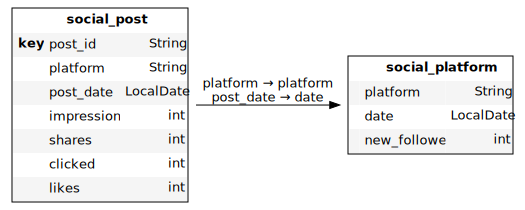

In [30]:
cube_social.schema

In [31]:
# defining the measure, level and hierarchy in the cube.

h, l, m = cube_social.hierarchies, cube_social.levels, cube_social.measures

In [32]:
# Here we create levels on date using the 'date'

cube_social.create_date_hierarchy(
    "Date_social",
    column=social_store["post_date"],
    levels={"Year": "YYYY", "Quarter": "QQQ", "Month": "MM", "Week number": "w"},
)

In [33]:
session.visualize("Total weekly post by platforms")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [34]:
m["like_ratio"] = m["likes.SUM"] / m["contributors.COUNT"]
m["comment_ratio"] = m["shares.SUM"] / m["contributors.COUNT"]
m["click_ratio"] = m["clicked.SUM"] / m["contributors.COUNT"]
m["share_ratio"] = m["shares.SUM"] / m["contributors.COUNT"]

# post performance by likes
m["like_propotion"] = m["likes.MEAN"] / m["contributors.COUNT"]

In [35]:
session.visualize("Average like comments and click per post on various platforms")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [36]:
session.visualize("post propotion by month and platform")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [37]:
session.visualize("post performance by number of shares")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [38]:
# let us summarize this information in a new page in the dasboard.
session.link(path="#/dashboard/02f")

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

# Conclusion:

We saw above, how atoti can seamlessly connect totally different dataset to bring to you the complete big picture you wanted for all your KPIs.  
The above mogic of creating a digital marketing dashboard from discrete and disconnected sources can be extraplolated to any domain and for any specific part of digital marketing.  

**Now we would like to invite you to try and for yourself how atoti can make your data tell wonderful stories!!**

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=creditcard-fraud-detection" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover-try.png" alt="Try atoti"></a></div>